<a href="https://colab.research.google.com/github/matsl92/machine_learning/blob/main/regressors/laboratorio_1_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from matplotlib import pyplot as plt

In [2]:
Iris = datasets.load_iris()

iris = []
for flower in Iris.data:
  List = []
  for value in flower:
    List.append(float(value))
  iris.append(List)

sepal_lengths, sepal_widths, petal_lengths, petal_widths = [], [], [], []
measures = [sepal_lengths, sepal_widths, petal_lengths, petal_widths]
for flower in iris:
  for i in range(4):
    measures[i].append(flower[i])

norm_iris = []
for i in range(150):
  flower = []
  for j in range(4):
    flower.append((measures[j][i]-min(measures[j]))/(max(measures[j])-min(measures[j])))
  norm_iris.append(flower)

Se crea una lista iris que emula el array Iris, con el fin de aplicar MinMaxScaler de manera manual (paso a paso sin el uso de librerías #justforfun.)

In [3]:
# Primer punto

def KNN(instance, k):
  
  norm_instance = []
  for i in range(4):
    norm_instance.append((instance[i]-min(measures[i]))/(max(measures[i])-min(measures[i])))

  EDs = []
  for flower in norm_iris:
    ED = 0
    for i in range(len(flower)):
      ED += (norm_instance[i]-flower[i])**2
    ED = ED**(1/2)
    EDs.append(ED)
  
  indexes = []
  for i in range(k):
    indexes.append(EDs.index(sorted(EDs)[i]))
  
  print("Indices de las", k, "muestras más cercanas a", instance )
  return indexes

# Ejemplo
KNN(np.array([4.2, 3.2, 1.6, 0.3]), 4)

Indices de las 4 muestras más cercanas a [4.2 3.2 1.6 0.3]


[42, 38, 47, 3]

Se define la funcion KNN que nos piden y se normaliza el vector de entrada para calcular la distancia euclidiana(ED) de éste con respecto a cada muestra (se normaliza debido a que cada característica varía en rangos diferentes de longitudes, y aunque todas están en centimetros y en un rango menor que 0 y 10 siguen teniendo rangos diferentes, por ejemplo la media del ancho de los pétalos corresponde a menos de la cuarta parte de la media del largo de los sépalos, y esto hace que a la hora de medir la distancia euclidiana entre la muestra de entrada y las muestras de la base de datos Iris, unas características tengan más peso que otras), luego se añade el valor resultante a una lista que se organiza de forma ascendente y se toman los k primeros valores de esta para finalmente hallar los indices de estos valores en la lista contenedora de las distancias.

In [4]:
# Segundo punto
n = 12
Array_1 = np.random.choice(range(0, 2), n)
Array_2 = np.random.choice(range(0, 2), n)

Hamming_distance = 0
for i in range(n):
  if Array_1[i] != Array_2[i]:
    Hamming_distance += 1
  else:
    pass
print("Vector 1: ", Array_1)
print("Vector 2: ", Array_2)
print("La distancia Hamming entre ambos vectores es: ", Hamming_distance)

Vector 1:  [0 0 1 1 0 0 0 1 1 0 1 1]
Vector 2:  [0 0 0 1 1 0 0 0 1 1 0 1]
La distancia Hamming entre ambos vectores es:  5


Se obtiene el valor de n por medio de un input y se crean los dos vectores de tamaño n con 0s y 1s de manera aleatoria, despues se declara la variable hamming_distance y se le da el valor de 0 para empezar, a continuación se cuentan las posiciones desiguales por medio de un ciclo for y finalmente se imprime tanto la distancia Hamming como los vectores que se crearon.

In [5]:
# Tercer punto
boston = datasets.load_boston()
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target, columns=["MEDV"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Se carga la base de datos en la variable boston y se crean dos dataframes, uno que contiene los atributos o caracteristicas y otro para el target.

In [6]:
# b)

norm_x = pd.DataFrame(MinMaxScaler().fit_transform(df_x), columns=boston.feature_names)

Se normalizan el dataframe con las caracteristicas ya que cada una de estas tiene escalas diferentes lo que podría ocasionar que unas tengan mayor peso que otras a la hora de aplicar los modelos de aprendizaje supervisado.

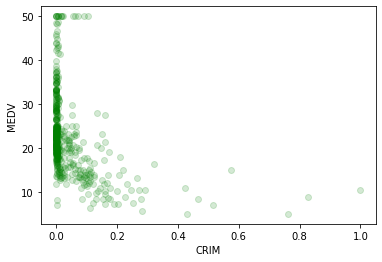

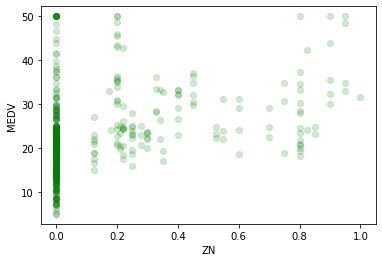

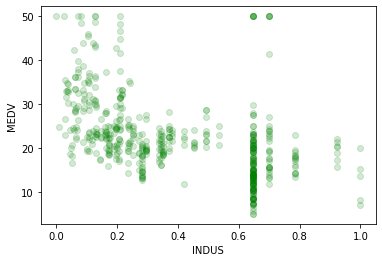

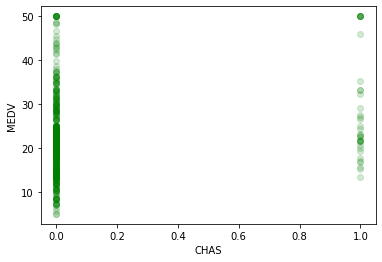

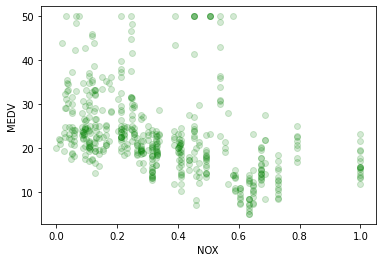

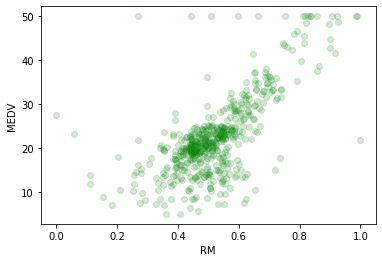

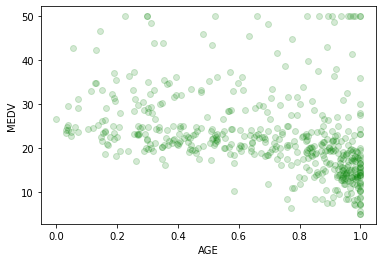

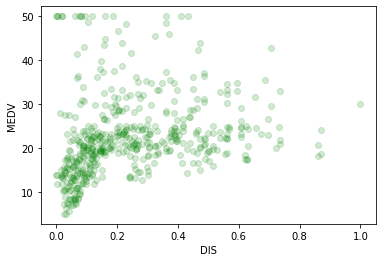

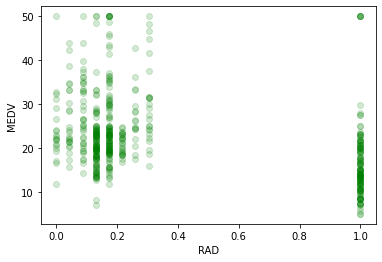

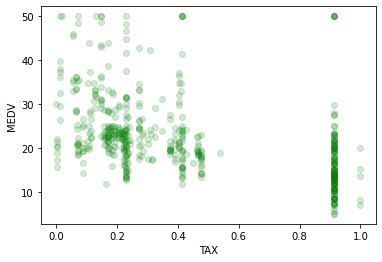

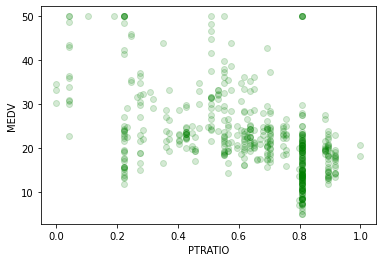

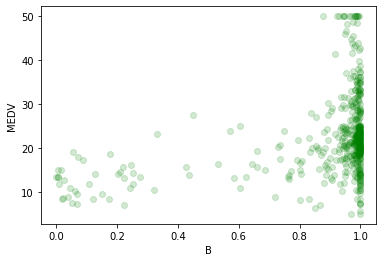

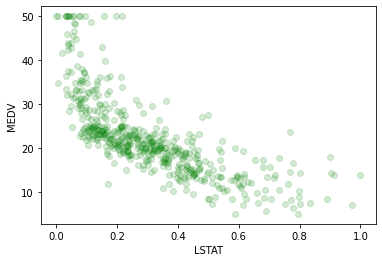

In [7]:
# c)

for feature in norm_x:
  plt.scatter(norm_x[feature], df_y, color = "g", alpha = .17)
  plt.xlabel(feature)
  plt.ylabel("MEDV")
  plt.show()

Por medio de un ciclo for se grafica una a una todas las características del dataframe con los datos de x contra el target.

In [8]:
x_data = pd.DataFrame(norm_x.loc[:, ["RM", "AGE", "LSTAT"]])
x_data.tail()

,RM,AGE,LSTAT
501,0.580954,0.681771,0.219095
502,0.490324,0.760041,0.202815
503,0.654340,0.907312,0.107892
504,0.619467,0.889804,0.131071
505,0.473079,0.802266,0.169702


Seguidamente, luego de un análisis visual se elije LSTAT, AGE y RM como las tres caracteristicas que mantienen una relacion más predecible con respecto al target.

In [9]:
# d)

X_train, X_test, Y_train, Y_test = train_test_split(x_data, df_y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 3)
(152, 3)
(354, 1)
(152, 1)


Se divide la base de datos en las muestras que serán para entrenamiento y las que serán para prueba mediante la función train_test_split().

In [10]:
models = {}
model_results = []
model_names = []


models['Linear'] = LinearRegression()
models['Lasso'] = Lasso()
models['ElasticNet'] = ElasticNet()
models['Ridge'] = Ridge()
models['KNN'] = KNeighborsRegressor()

Se declara un diccionario donde se guardan los modelos que serán probados mediante cross validation, donde las keys corresponden a un nombre abreviado del modelo y los values a las clases de los modelos correspondientes.

Adicionalmente, se declaran dos listas: model_results, donde se guardarán los resultados de cada modelo y model_names, donde de guardarán los nombres de los modelos que se van probando.

In [11]:
for model_name in models:
    model = models[model_name]
    results = cross_val_score(model, X_train, Y_train, cv=4, scoring="neg_mean_squared_error")
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}".format(model_name, abs(round(results.mean(), 3))))

Linear: 29.439
Lasso: 61.781
ElasticNet: 73.847
Ridge: 29.439
KNN: 22.602


Se prueban los modelos y se obtiene la media de los 4 errores cuadraticos medios negativos de cada modelo (correspondiente a los 4 folds), junto con el nombre abreviado del modelo, y se elije el modelo con el error más cercano a cero para seguir con el proceso.

In [12]:
# e)

final_model_results = []
folds = []
for i in range(2, 16, 1):
  model_results = []
  results = cross_val_score(KNeighborsRegressor(), X_train, Y_train, cv=i, scoring="neg_mean_squared_error")
  ar = round(results.mean(),3)
  model_results.append(abs(ar))
  final_model_results.append(model_results[0])
  folds.append(i)
  print("{} folds: {}".format(i, model_results))

2 folds: [22.749]
3 folds: [21.321]
4 folds: [22.602]
5 folds: [21.729]
6 folds: [21.522]
7 folds: [21.575]
8 folds: [21.706]
9 folds: [21.76]
10 folds: [21.044]
11 folds: [21.219]
12 folds: [21.822]
13 folds: [21.293]
14 folds: [21.421]
15 folds: [21.049]


Se prueba el modelo modificando el numero de folds, para esto se usa un ciclo for que prueba el modelo con k (de 2 a 15) número de folds.
y se obtiene tanto la media del error cuadrático medio negativo como el número de folds que se usaron para obtener dicho error.

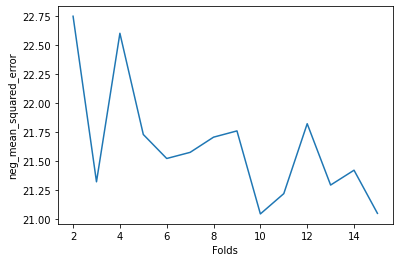

In [13]:
fig, ax = plt.subplots()
ax.plot(folds, final_model_results)
plt.xlabel("Folds")
plt.ylabel("neg_mean_squared_error")
plt.show()

Se grafica el número de folds contra el error cuadrático medio negativo. y podemos observar que los k folds con error más cercano a cero son 10 y 15 (los puntos más bajos en la gráfica).